In [1]:
# Import relevant packages
import gurobipy as gp                 # Gurobi Python API
from gurobipy import GRB              # Gurobi constants (e.g., GRB.MAXIMIZE)

import pandas as pd                   # DataFrames
import matplotlib.pyplot as plt       # Plotting
from matplotlib.lines import Line2D
import numpy as np                    # Numerical operations (similar to Julia base)

import warnings
warnings.filterwarnings("ignore", message=".*All values for SymLogScale are below linthresh.*")

In [2]:
# Import auxiliary functions
from functions_data import *
from functions_model import *
from functions_plots import *
from functions_policy import *

In [3]:
from main import main

# Base Cases: 4 players for each modelled season

## Winter Scenario for 4 players

  Player   OC   Eta   E_max   Q_max  \
0      A  5.0  0.85   630.0   316.0   
1      B  5.0  0.85  1260.0   633.0   
2      C  5.0  0.85  1900.0   950.0   
3      D  5.0  0.85  2530.0  1267.0   

                                             Q_steps  
0  [0.0, 31.6, 63.2, 94.8, 126.4, 158.0, 189.6, 2...  
1  [0.0, 63.3, 126.6, 189.9, 253.2, 316.5, 379.8,...  
2  [0.0, 95.0, 190.0, 285.0, 380.0, 475.0, 570.0,...  
3  [0.0, 126.7, 253.4, 380.1, 506.8, 633.5, 760.2...  
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-28
Optimization was successful. It converged in 5 iterations.


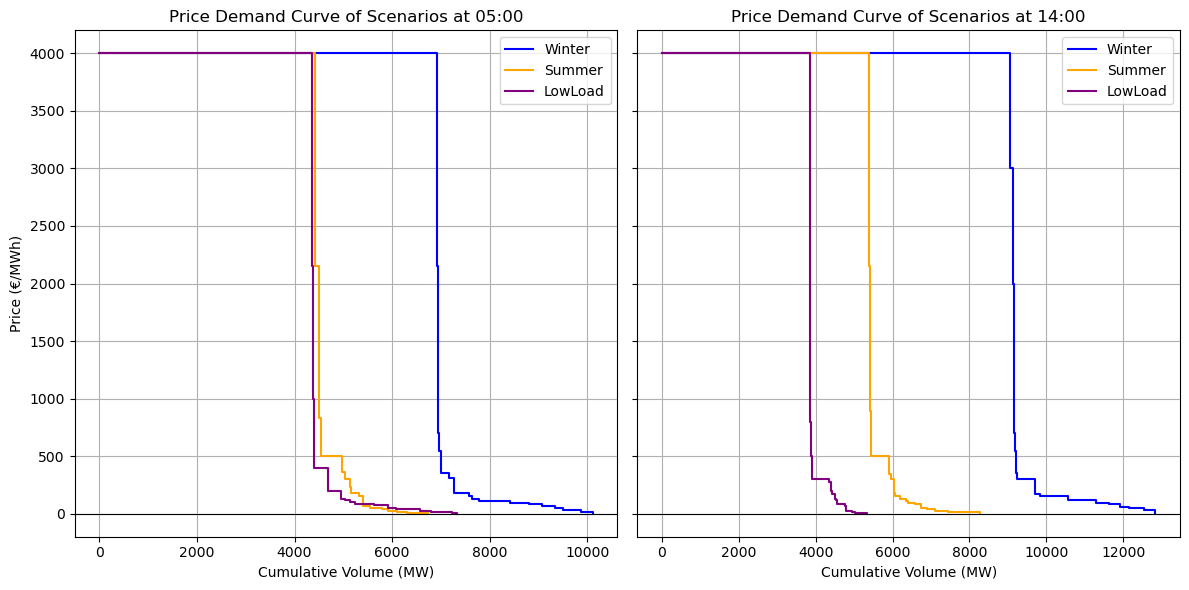

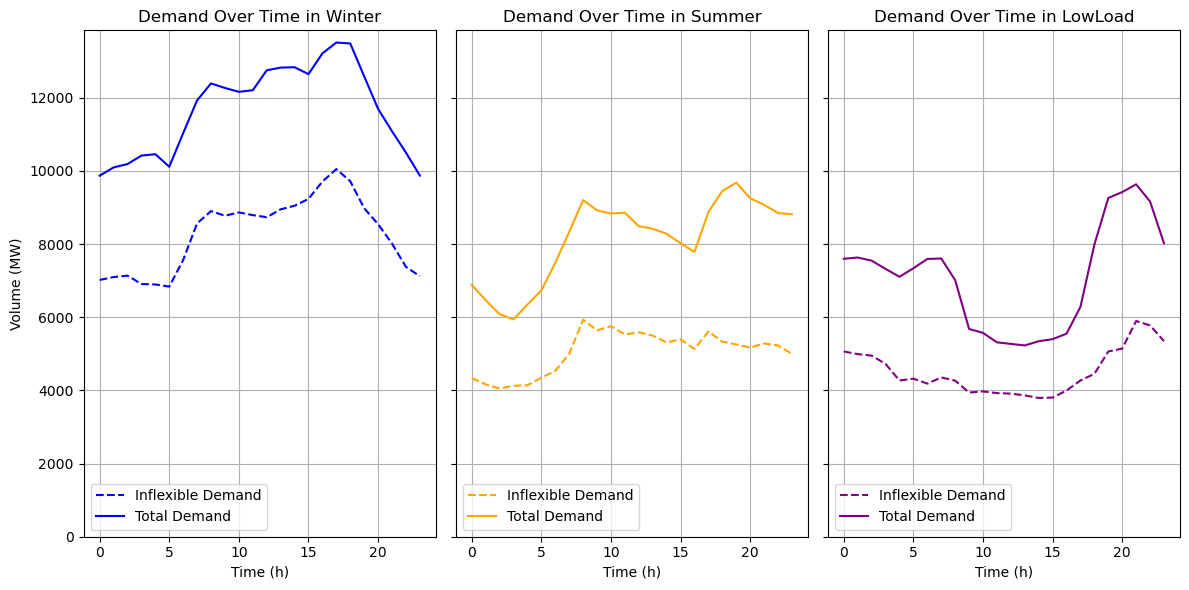

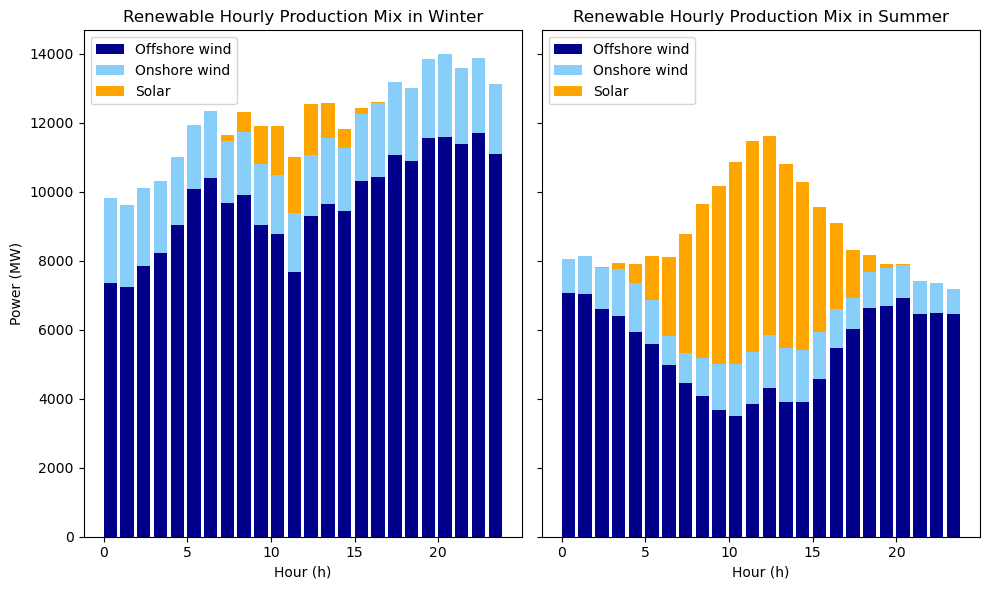

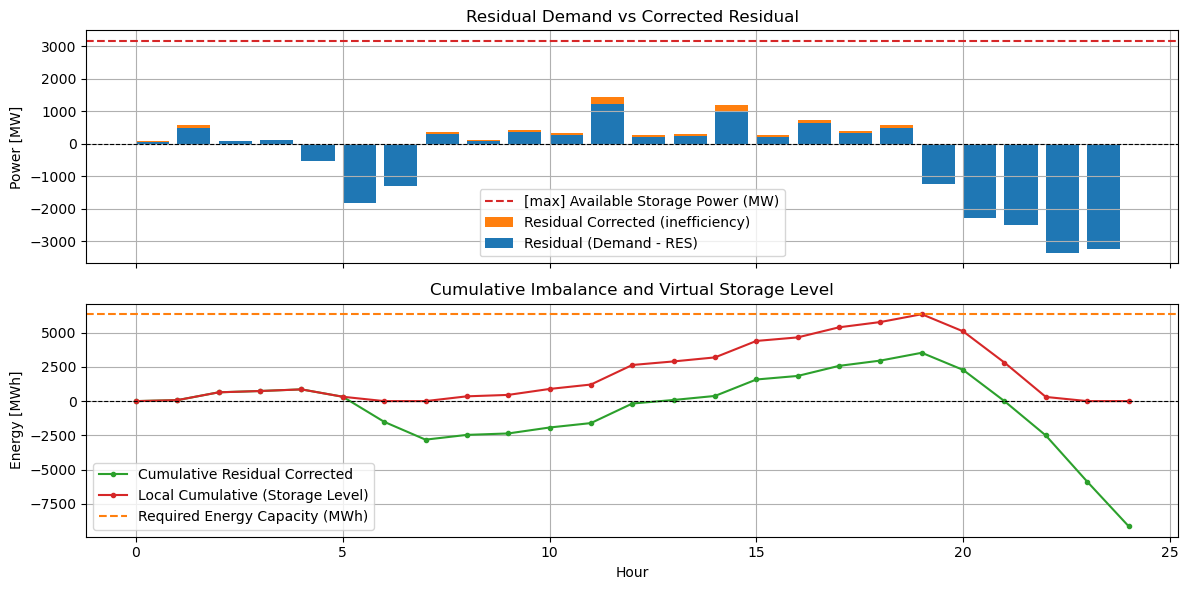

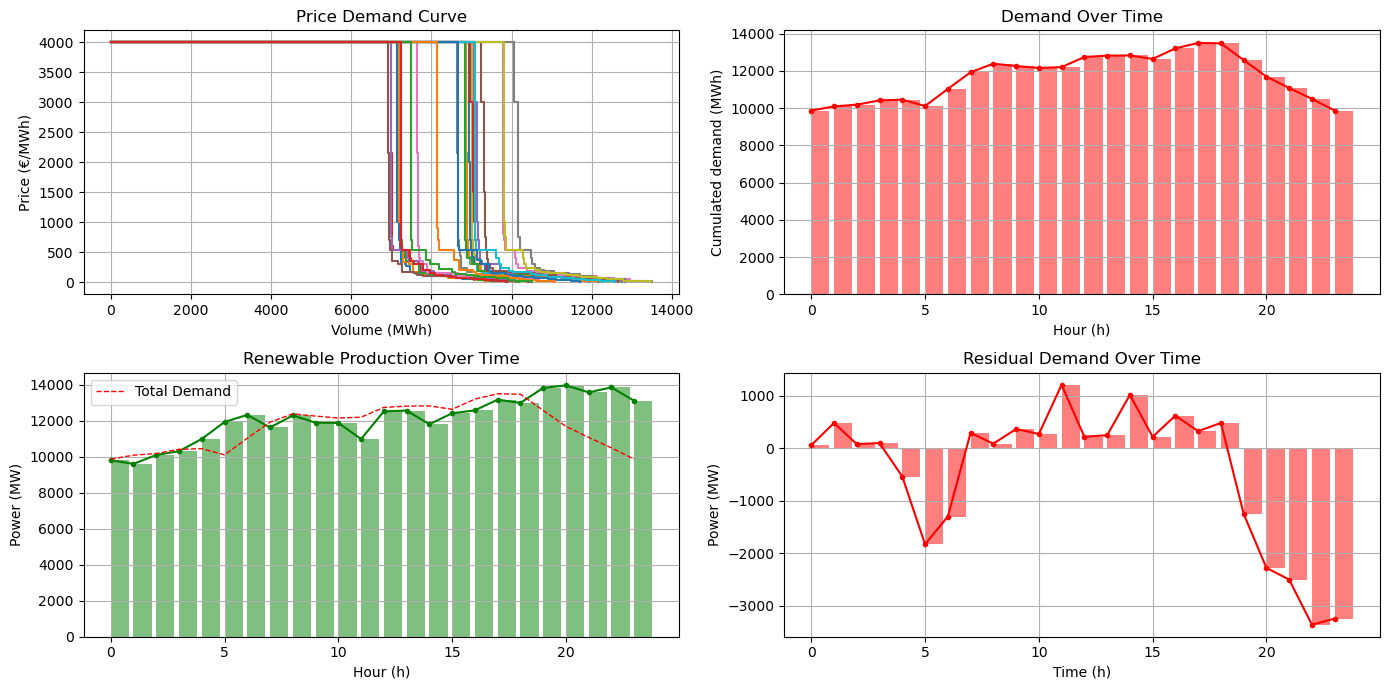

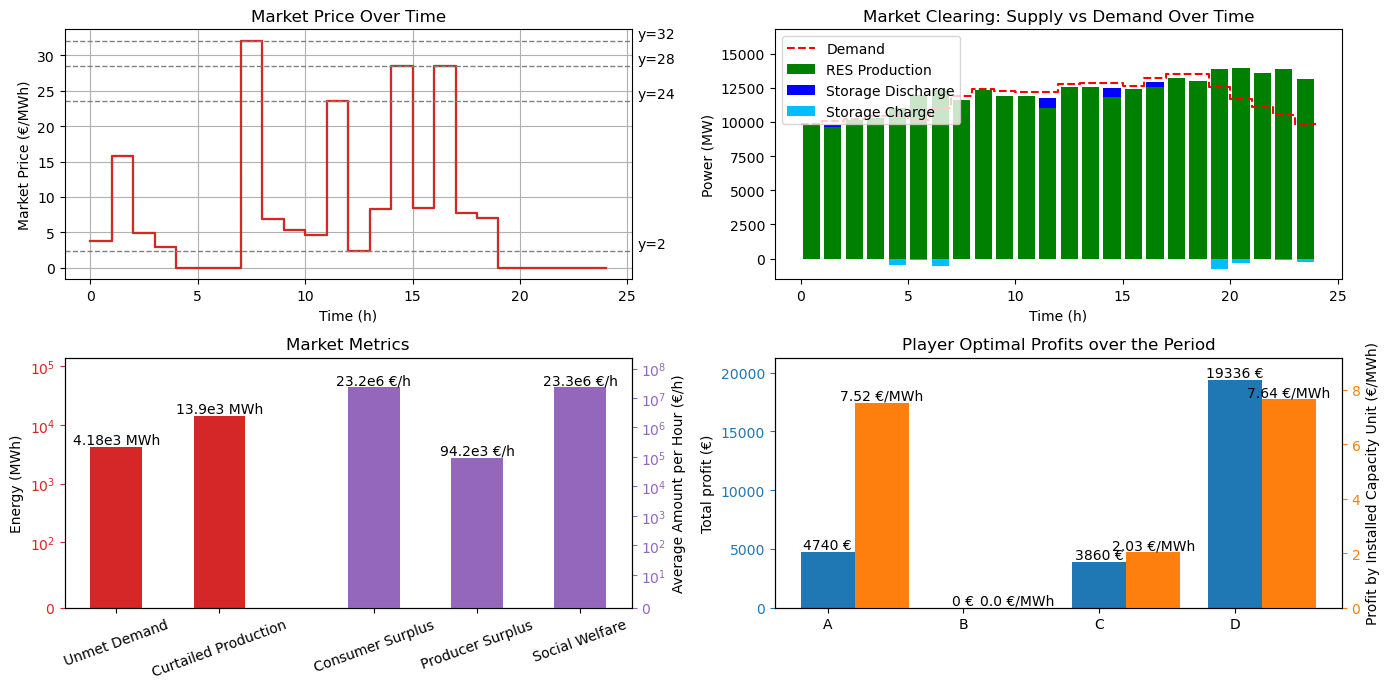

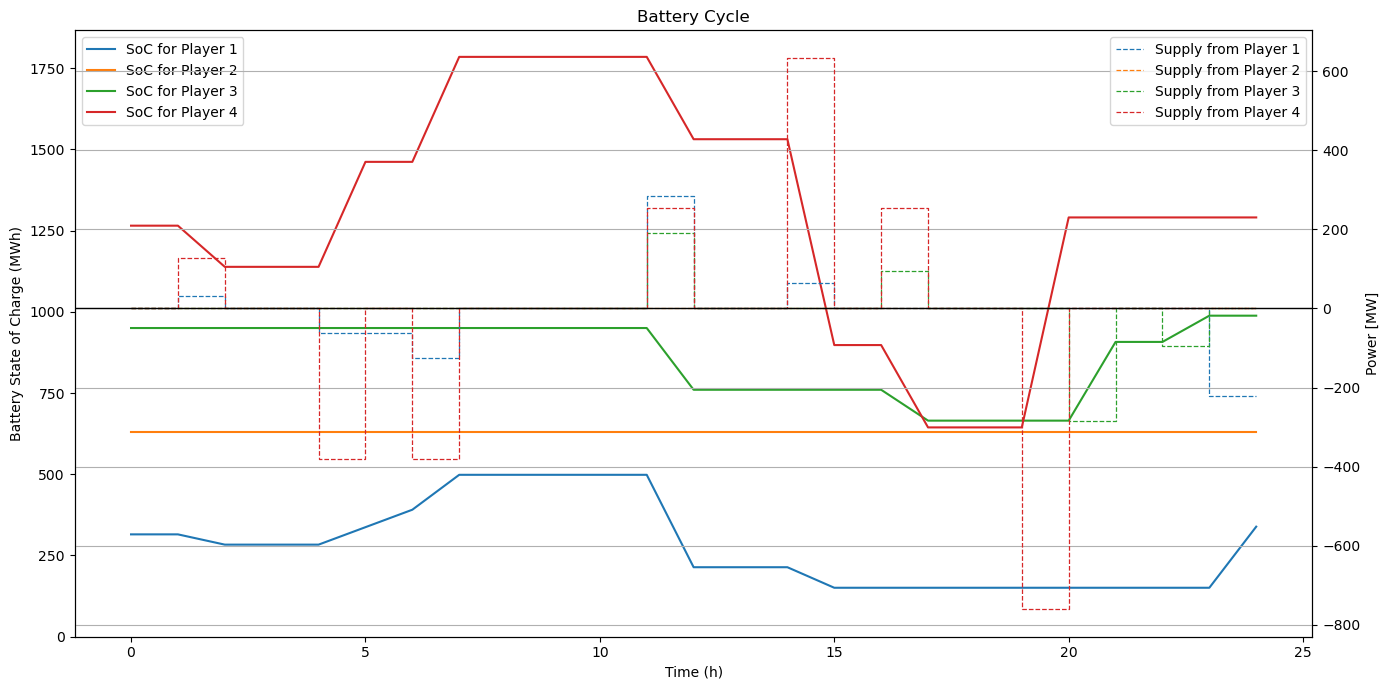

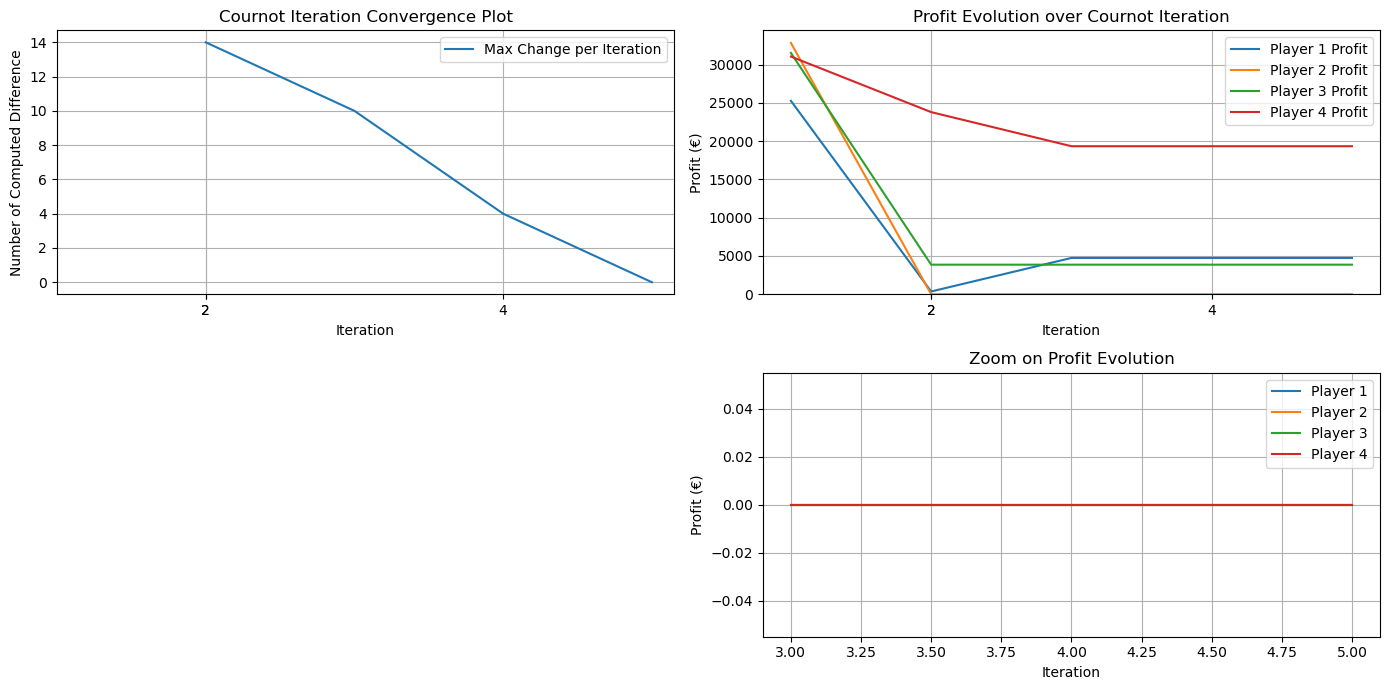

In [4]:
output = main(season='Winter', data_plots=True, scenario_plots=True, n_players=4)

## Summer Scenario for 4 players

  Player   OC   Eta   E_max   Q_max  \
0      A  5.0  0.85  1150.0   576.0   
1      B  5.0  0.85  2300.0  1152.0   
2      C  5.0  0.85  3450.0  1728.0   
3      D  5.0  0.85  4600.0  2304.0   

                                             Q_steps  
0  [0.0, 57.6, 115.2, 172.8, 230.4, 288.0, 345.6,...  
1  [0.0, 115.2, 230.4, 345.6, 460.8, 576.0, 691.2...  
2  [0.0, 172.8, 345.6, 518.4, 691.2, 864.0, 1036....  
3  [0.0, 230.4, 460.8, 691.2, 921.6, 1152.0, 1382...  
Optimization was successful. It converged in 8 iterations.


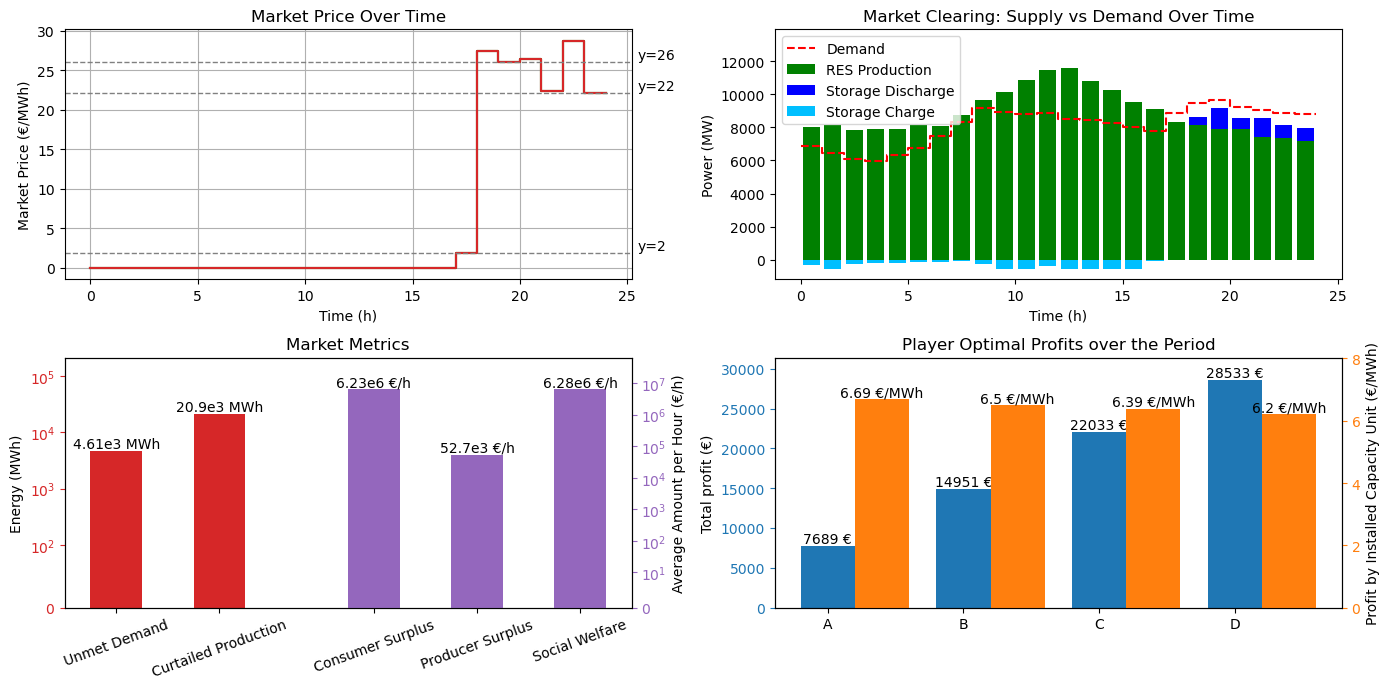

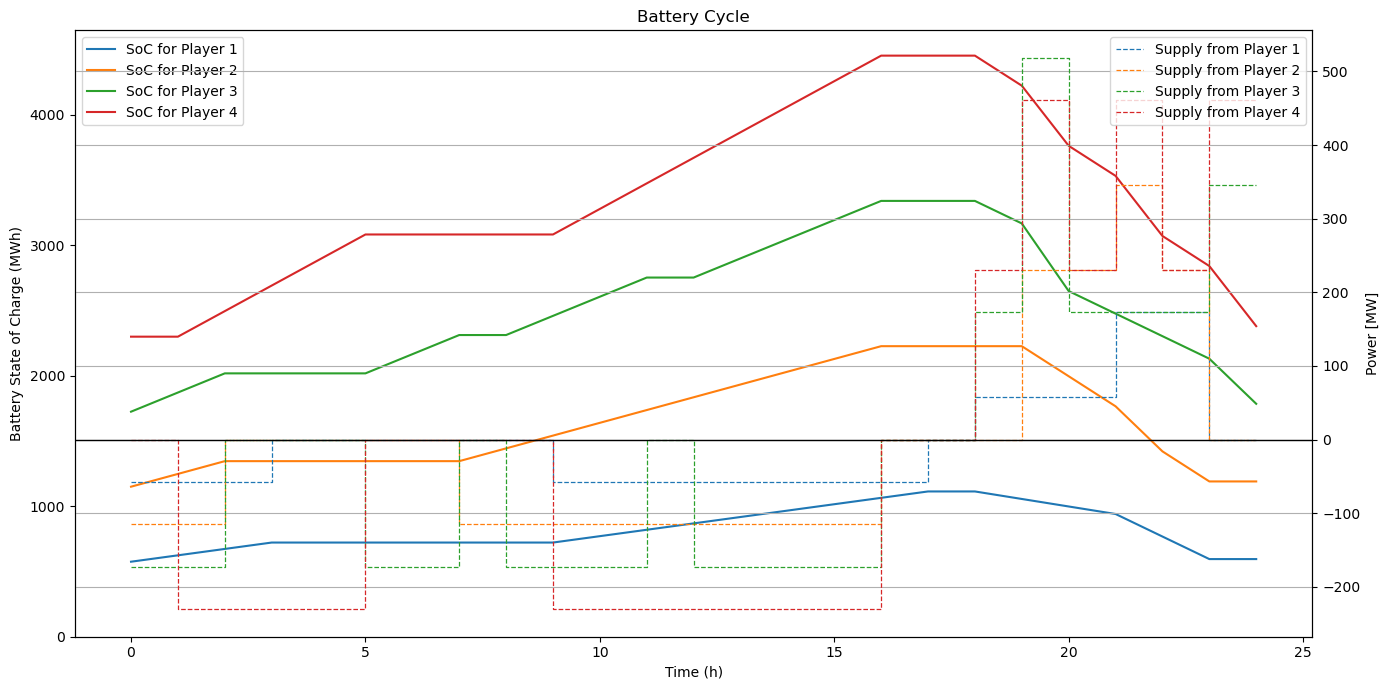

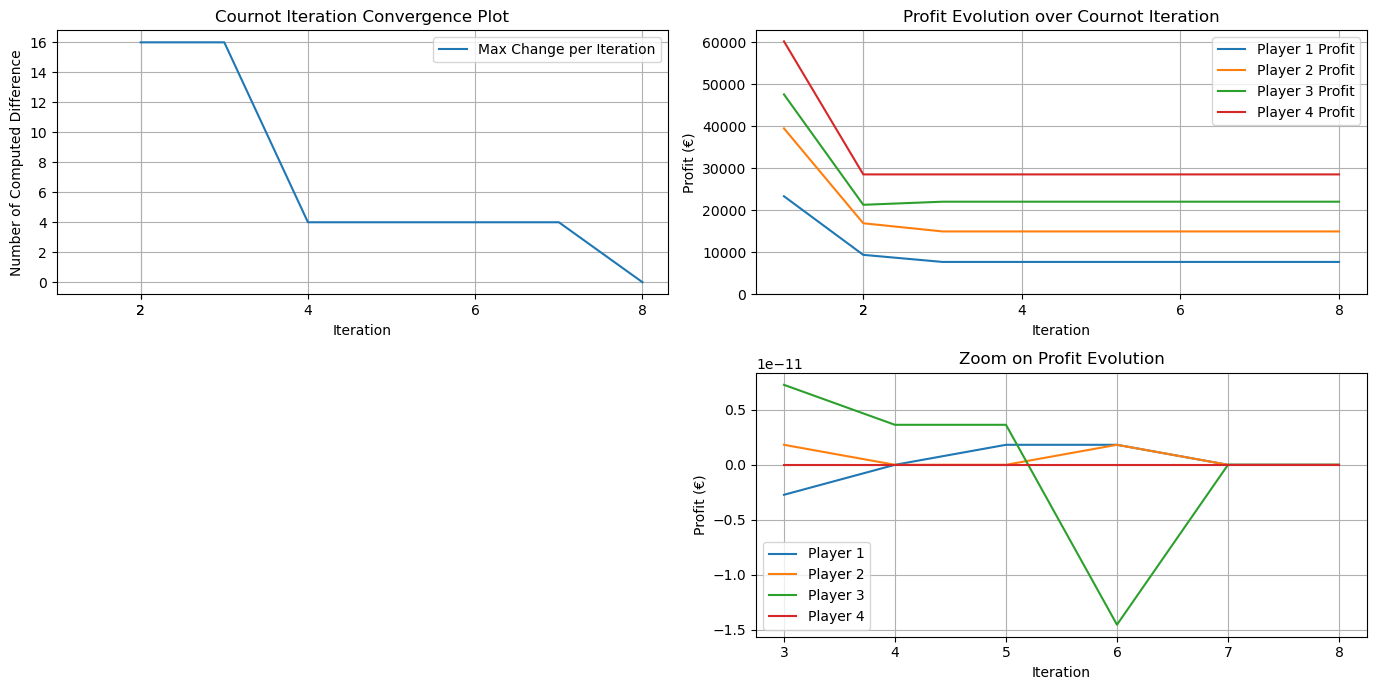

In [ ]:
output = main(season='Summer', data_plots=False, scenario_plots=False, n_players=4)

## Low Load Scenario for 4 players

  Player   OC   Eta   E_max   Q_max  \
0      A  5.0  0.85   910.0   457.0   
1      B  5.0  0.85  1820.0   914.0   
2      C  5.0  0.85  2740.0  1371.0   
3      D  5.0  0.85  3650.0  1828.0   

                                             Q_steps  
0  [0.0, 45.7, 91.4, 137.1, 182.8, 228.5, 274.2, ...  
1  [0.0, 91.4, 182.8, 274.2, 365.6, 457.0, 548.4,...  
2  [0.0, 137.1, 274.2, 411.3, 548.4, 685.5, 822.6...  
3  [0.0, 182.8, 365.6, 548.4, 731.2, 914.0, 1096....  
Convergence has not been reached. Let's try again by fixing player A outputs.
Convergence has not been reached. Let's try again by fixing player B outputs.
Optimization was successful. It converged in 222 iterations.


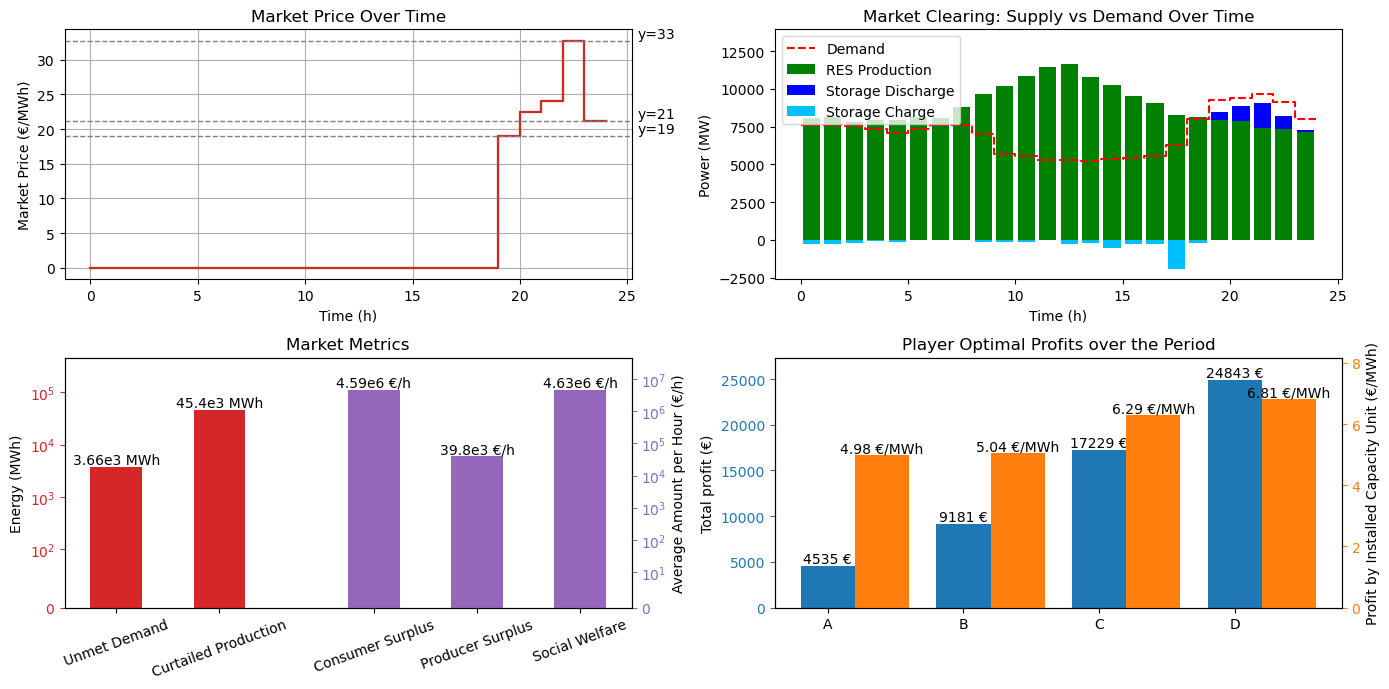

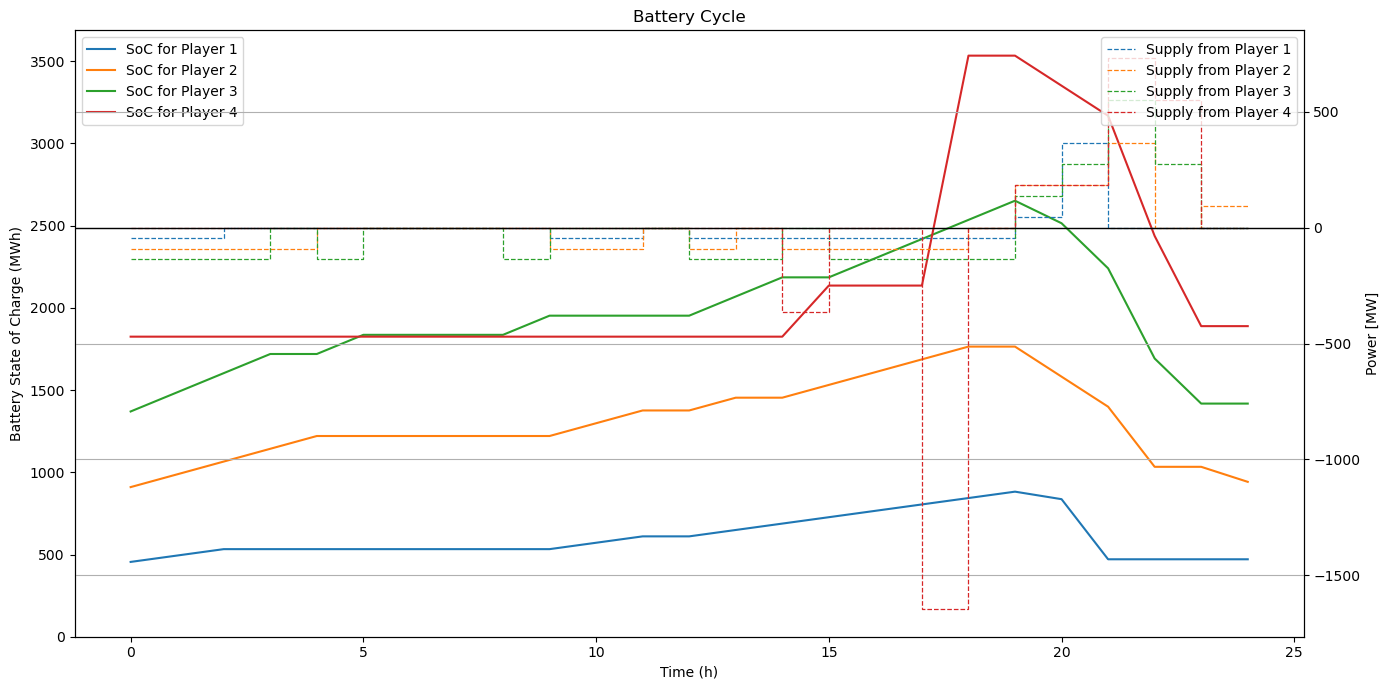

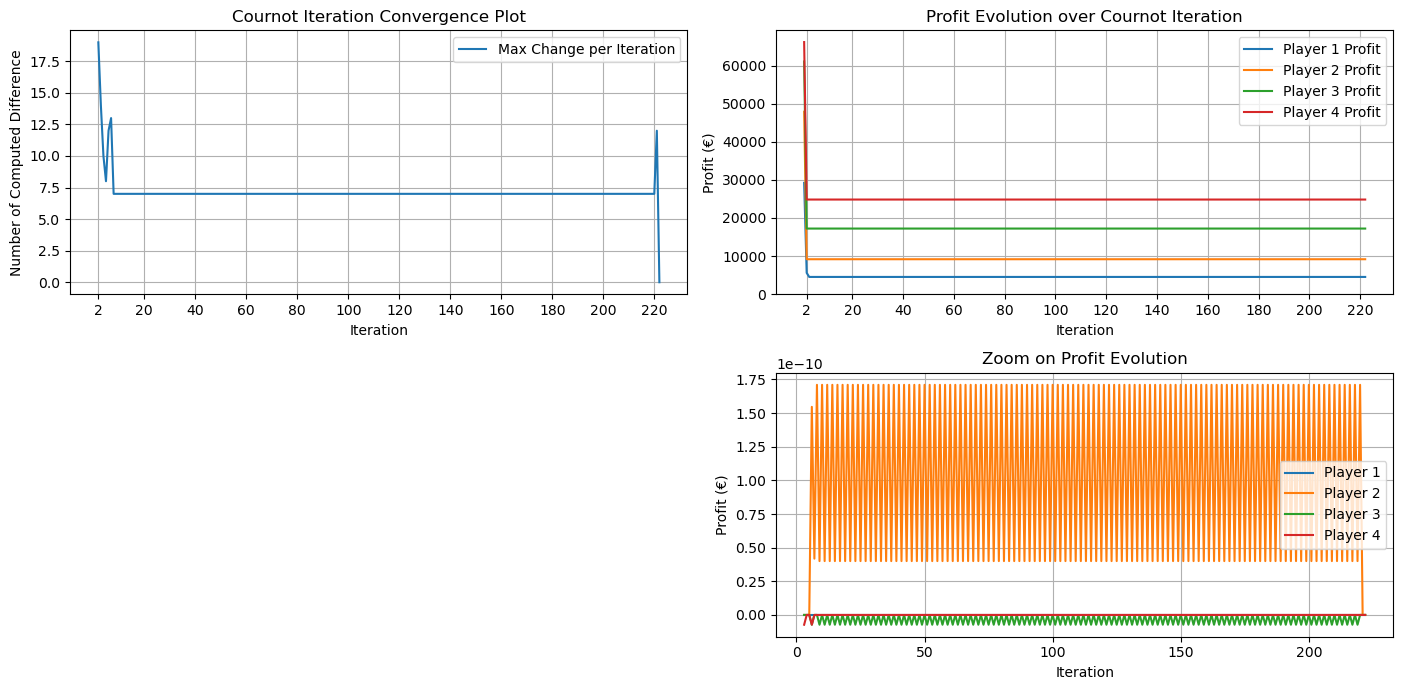

In [ ]:
output = main(season='LowLoad', data_plots=False, scenario_plots=False, n_players=4)

# Policy Modelling

In [ ]:
scenarios = [
    {"name": "baseline", "policy_type": "none"},
    {"name": "flat_tariff", "policy_type": "grid_tariff_flat", "tau_ch": 4.0, "tau_dis": 2.0},
    {"name": "hourly_tariff", "policy_type": "grid_tariff_hourly", "min_val": 2.0, "max_val": 5.0},
    {"name": "dynamic_tariff", "policy_type": "grid_tariff_dynamic", "alpha": 0.001, "base_tariff": 5.0, "floor_tariff": 2.0}
]

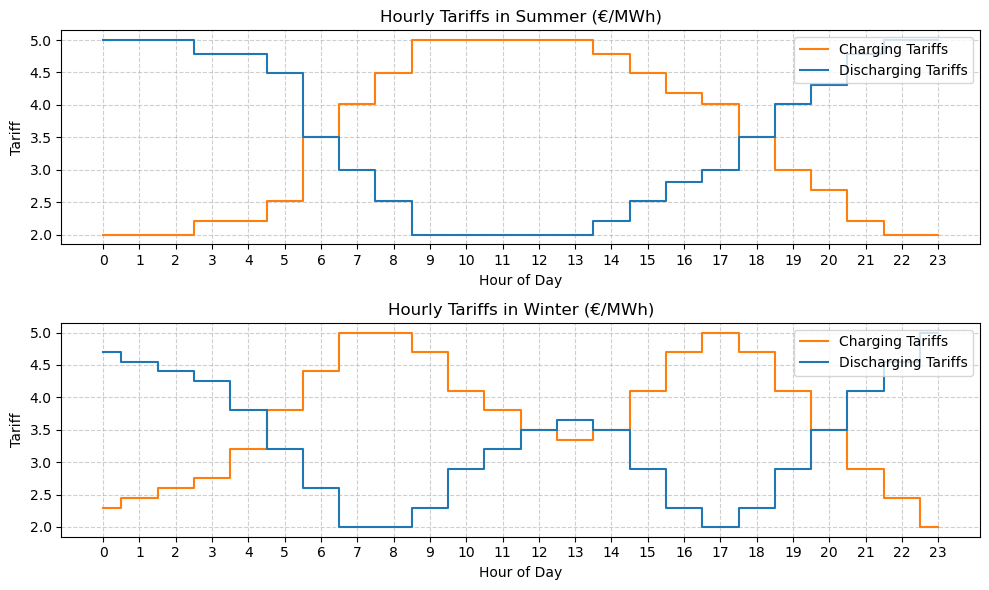

In [ ]:
## Hourly Tariffs
hourly_scenario = [scen for scen in scenarios if scen['name']=="hourly_tariff"]
min_val = hourly_scenario[0].get("min_val", 2.0)
max_val = hourly_scenario[0].get("max_val", 5.0)

tau_ch_hourly_summer = generate_hourly_tariff_vector('charging', 'Summer', min_val, max_val)
tau_dis_hourly_summer = generate_hourly_tariff_vector('discharging', 'Summer', min_val, max_val)
tau_ch_hourly_winter = generate_hourly_tariff_vector('charging', 'Winter', min_val, max_val)
tau_dis_hourly_winter = generate_hourly_tariff_vector('discharging', 'Winter', min_val, max_val)

fig, axs = plt.subplots(2,1,figsize=(10, 6))
axs[0].step(range(24), tau_ch_hourly_summer, where='mid', label='Charging Tariffs', color='tab:orange')
axs[0].step(range(24), tau_dis_hourly_summer, where='mid', label='Discharging Tariffs', color='tab:blue')
axs[0].set_title("Hourly Tariffs in Summer (€/MWh)")
axs[0].set_xlabel("Hour of Day")
axs[0].set_ylabel("Tariff")
axs[0].grid(True, linestyle='--', alpha=0.6)
axs[0].legend(loc='upper right')
axs[0].set_xticks(range(24))

axs[1].step(range(24), tau_ch_hourly_winter, where='mid', label='Charging Tariffs', color='tab:orange')
axs[1].step(range(24), tau_dis_hourly_winter, where='mid', label='Discharging Tariffs', color='tab:blue')
axs[1].set_title("Hourly Tariffs in Winter (€/MWh)")
axs[1].set_xlabel("Hour of Day")
axs[1].set_ylabel("Tariff")
axs[1].grid(True, linestyle='--', alpha=0.6)
axs[1].legend(loc='upper right')
axs[1].set_xticks(range(24))

plt.tight_layout()
plt.show()

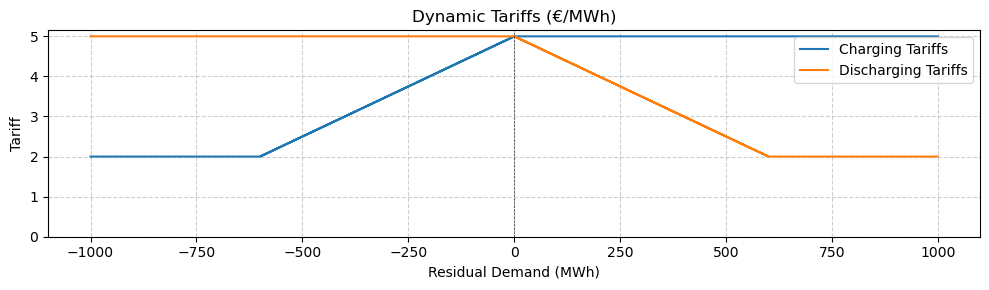

In [ ]:
dynamic_scenario = [scen for scen in scenarios if scen['name']=="dynamic_tariff"]
alpha = dynamic_scenario[0].get("alpha", 0.001)
threshold = dynamic_scenario[0].get("threshold", 0.0)
base_tariff = dynamic_scenario[0].get("base_tariff", 5.0)
floor_tariff = dynamic_scenario[0].get("floor_tariff", 2.0)

residual_serie = np.arange(-1000,1000)
tau_ch_dynamic = compute_charging_tariff_from_residual_demand(residual_serie, alpha, threshold, base_tariff, floor_tariff)
tau_dis_dynamic = compute_discharging_tariff_from_residual_demand(residual_serie, alpha, threshold, base_tariff, floor_tariff)

plt.figure(figsize=(10, 3))
plt.step(residual_serie, tau_ch_dynamic, where='mid', label='Charging Tariffs')
plt.step(residual_serie, tau_dis_dynamic, where='mid', label='Discharging Tariffs')
plt.title("Dynamic Tariffs (€/MWh)")
plt.xlabel("Residual Demand (MWh)")
plt.ylim(bottom=0)
plt.axvline(x=0, color='black', alpha=0.8, linestyle='--', linewidth=0.5)
plt.ylabel("Tariff")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

## Winter Scenario


Optimization with modelling policy: baseline
  Player   OC   Eta   E_max   Q_max  \
0      A  5.0  0.85   630.0   316.0   
1      B  5.0  0.85  1260.0   633.0   
2      C  5.0  0.85  1900.0   950.0   
3      D  5.0  0.85  2530.0  1267.0   

                                             Q_steps  
0  [0.0, 31.6, 63.2, 94.8, 126.4, 158.0, 189.6, 2...  
1  [0.0, 63.3, 126.6, 189.9, 253.2, 316.5, 379.8,...  
2  [0.0, 95.0, 190.0, 285.0, 380.0, 475.0, 570.0,...  
3  [0.0, 126.7, 253.4, 380.1, 506.8, 633.5, 760.2...  
Optimization was successful. It converged in 5 iterations.


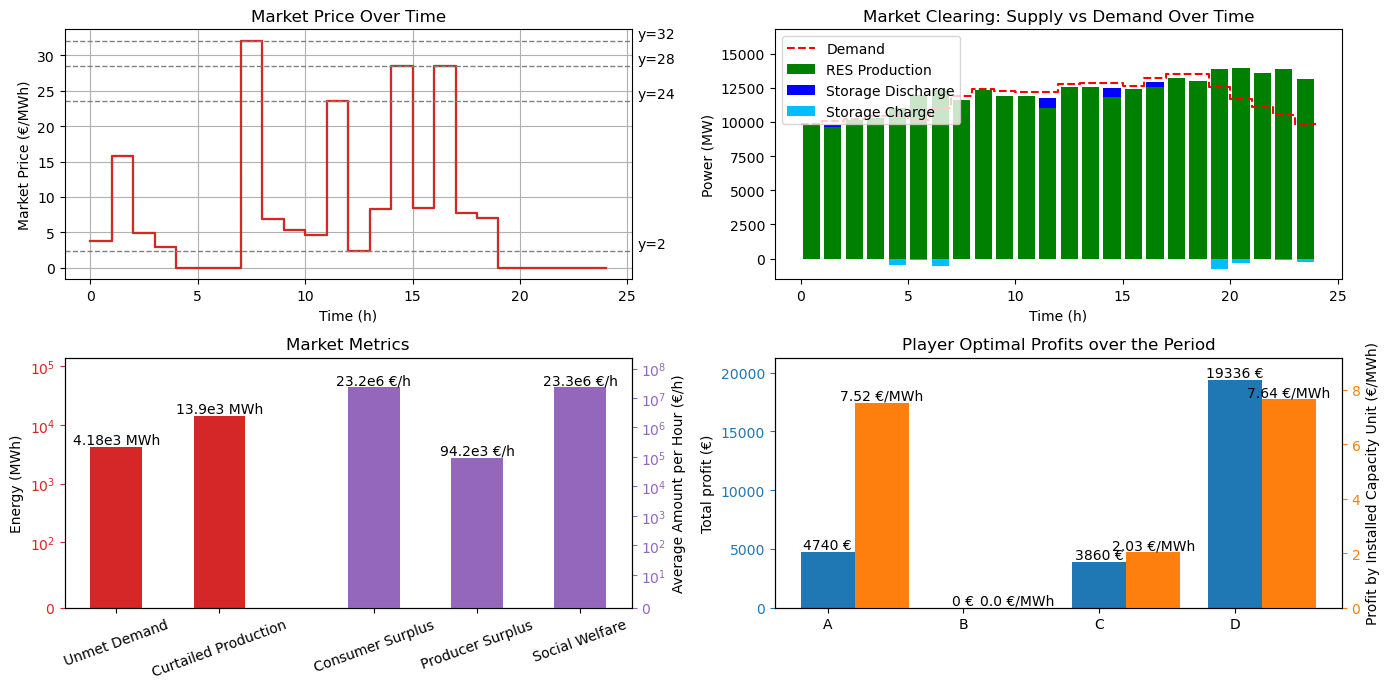

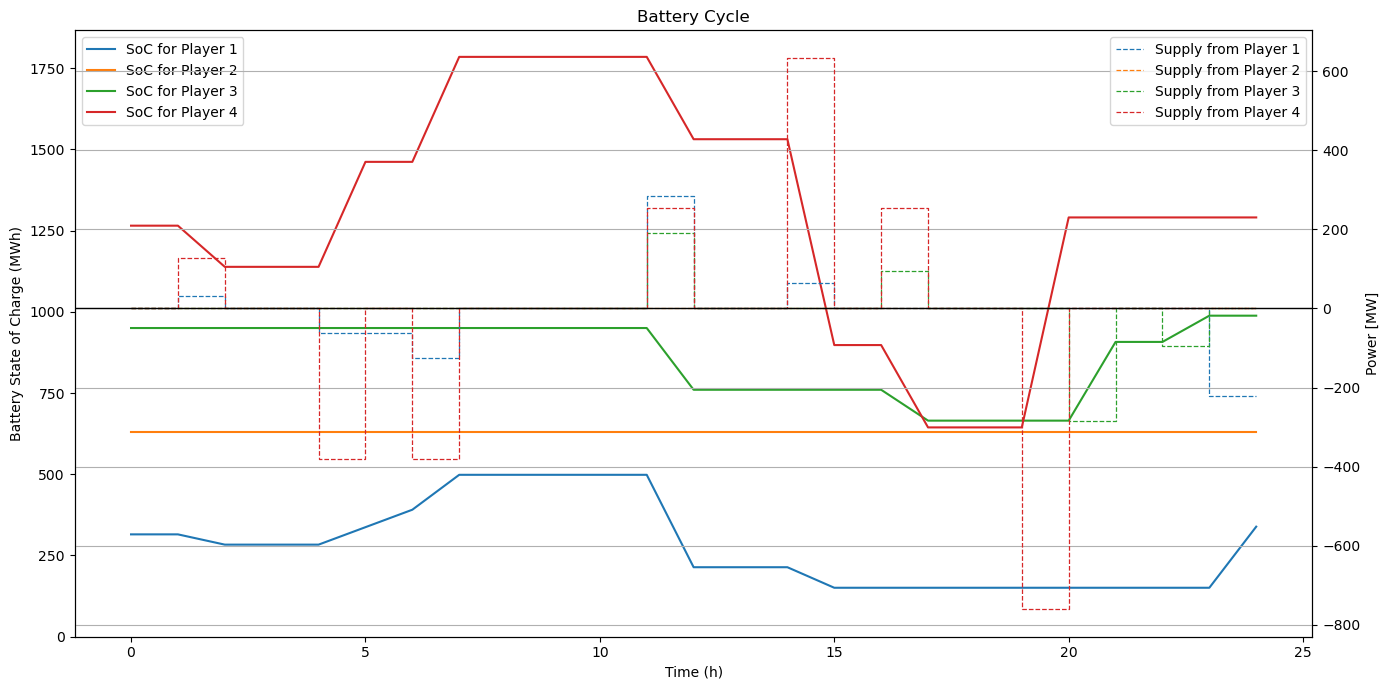

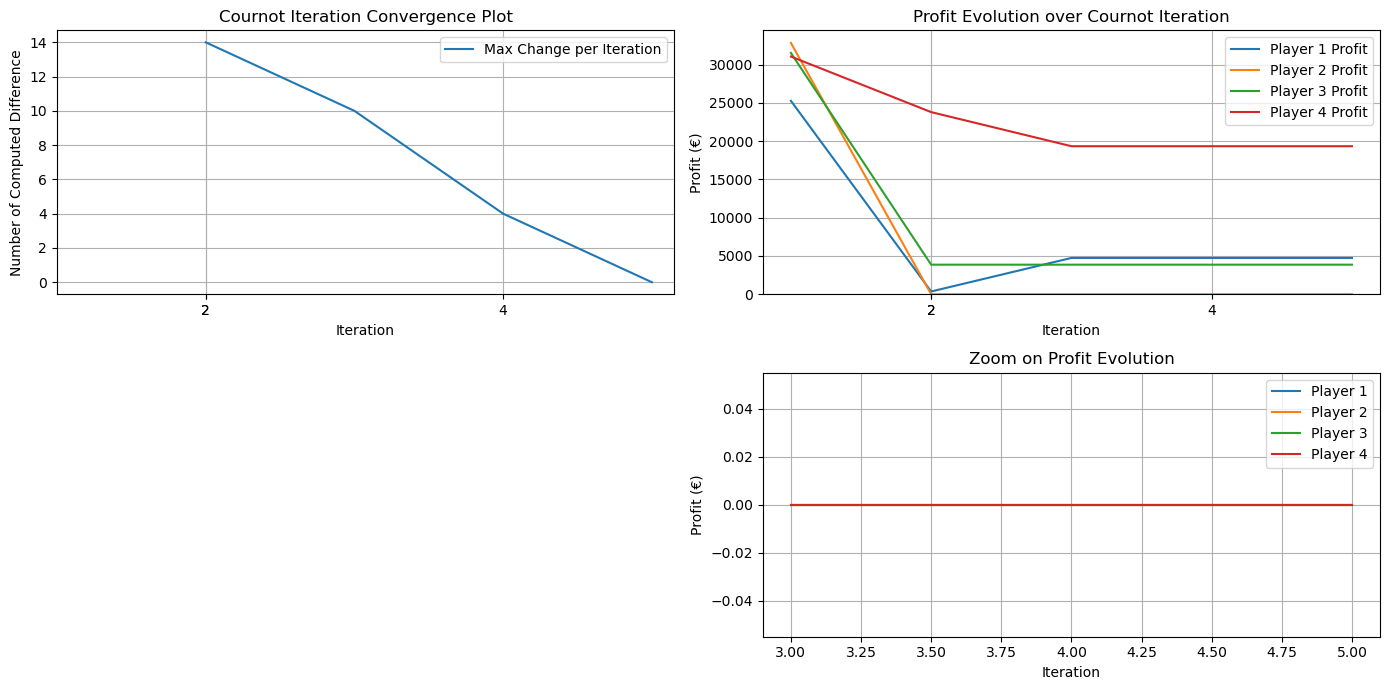


Optimization with modelling policy: flat_tariff
  Player   OC   Eta   E_max   Q_max  \
0      A  5.0  0.85   630.0   316.0   
1      B  5.0  0.85  1260.0   633.0   
2      C  5.0  0.85  1900.0   950.0   
3      D  5.0  0.85  2530.0  1267.0   

                                             Q_steps  
0  [0.0, 31.6, 63.2, 94.8, 126.4, 158.0, 189.6, 2...  
1  [0.0, 63.3, 126.6, 189.9, 253.2, 316.5, 379.8,...  
2  [0.0, 95.0, 190.0, 285.0, 380.0, 475.0, 570.0,...  
3  [0.0, 126.7, 253.4, 380.1, 506.8, 633.5, 760.2...  
Optimization was successful. It converged in 8 iterations.


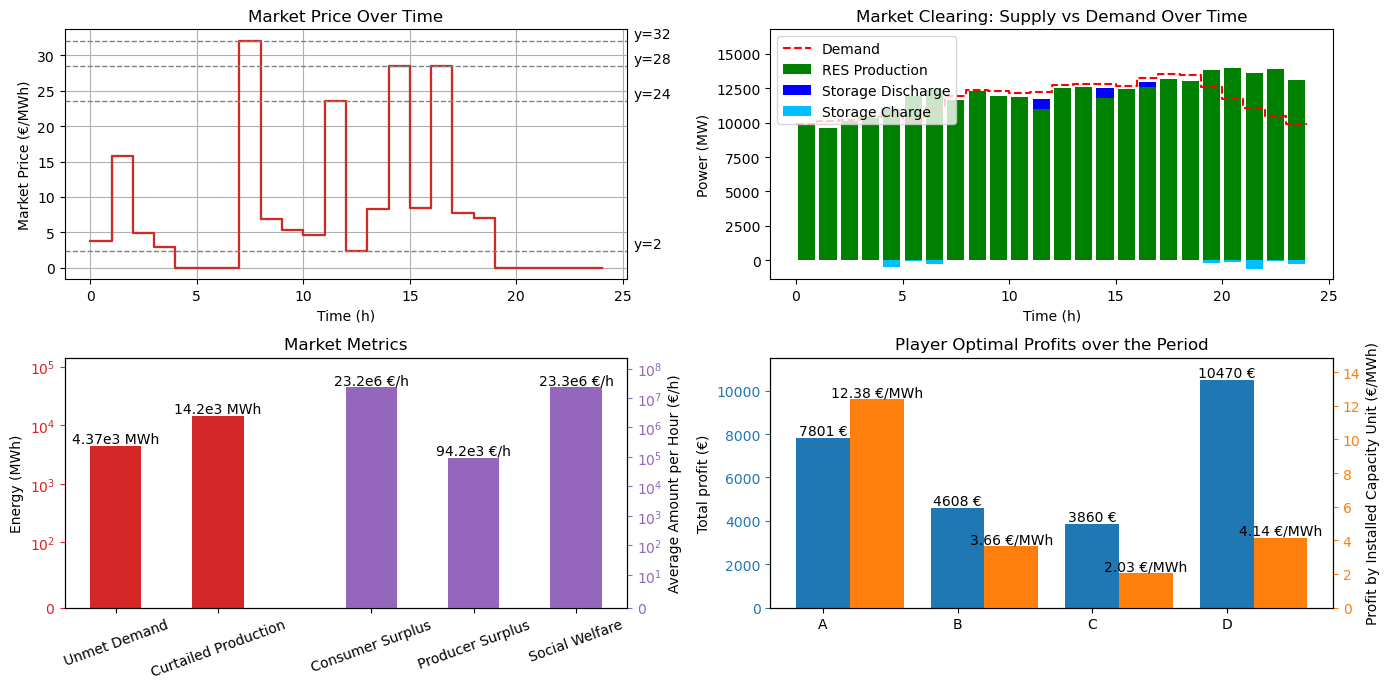

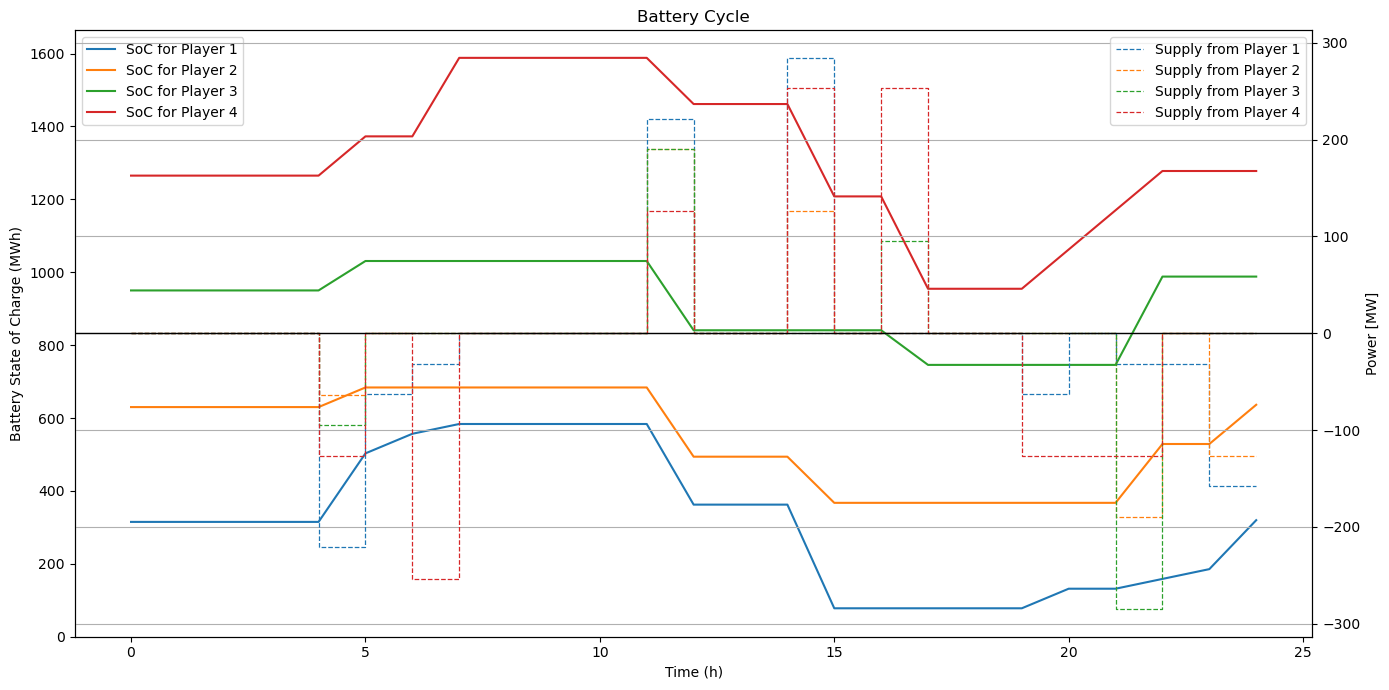

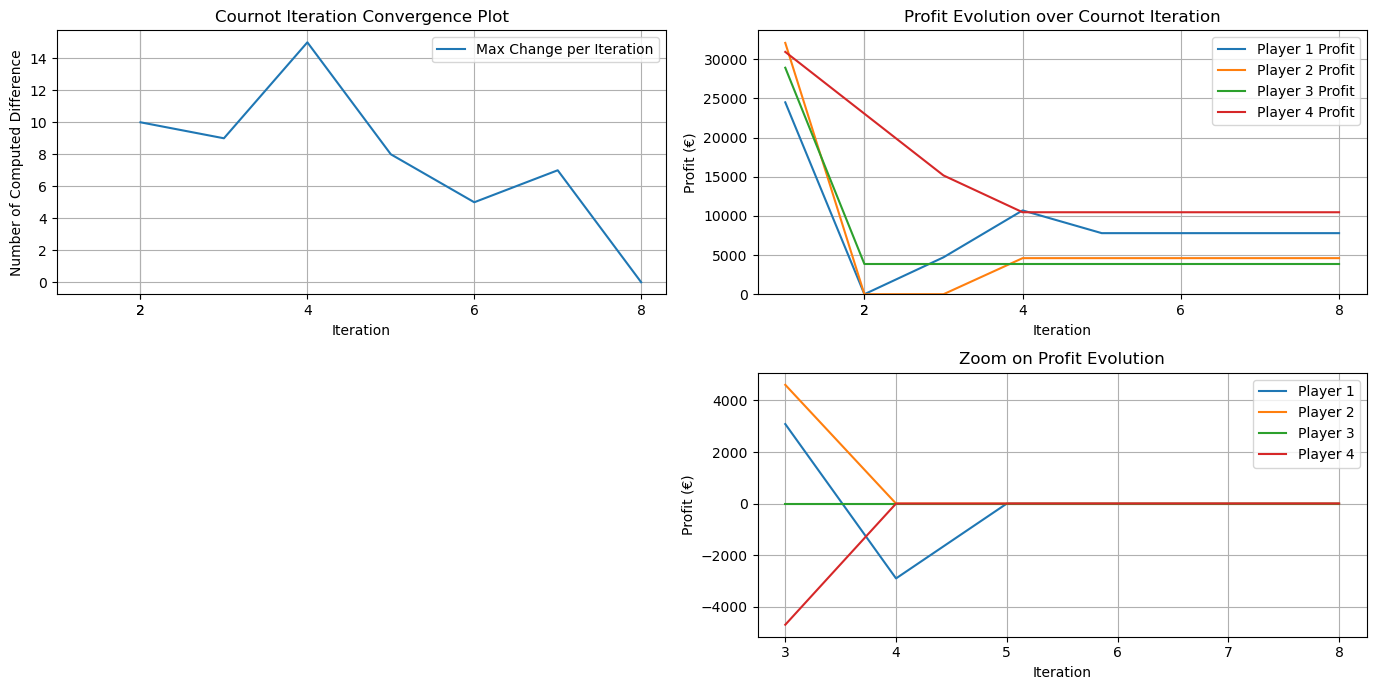


Optimization with modelling policy: hourly_tariff
  Player   OC   Eta   E_max   Q_max  \
0      A  5.0  0.85   630.0   316.0   
1      B  5.0  0.85  1260.0   633.0   
2      C  5.0  0.85  1900.0   950.0   
3      D  5.0  0.85  2530.0  1267.0   

                                             Q_steps  
0  [0.0, 31.6, 63.2, 94.8, 126.4, 158.0, 189.6, 2...  
1  [0.0, 63.3, 126.6, 189.9, 253.2, 316.5, 379.8,...  
2  [0.0, 95.0, 190.0, 285.0, 380.0, 475.0, 570.0,...  
3  [0.0, 126.7, 253.4, 380.1, 506.8, 633.5, 760.2...  
Optimization was successful. It converged in 4 iterations.


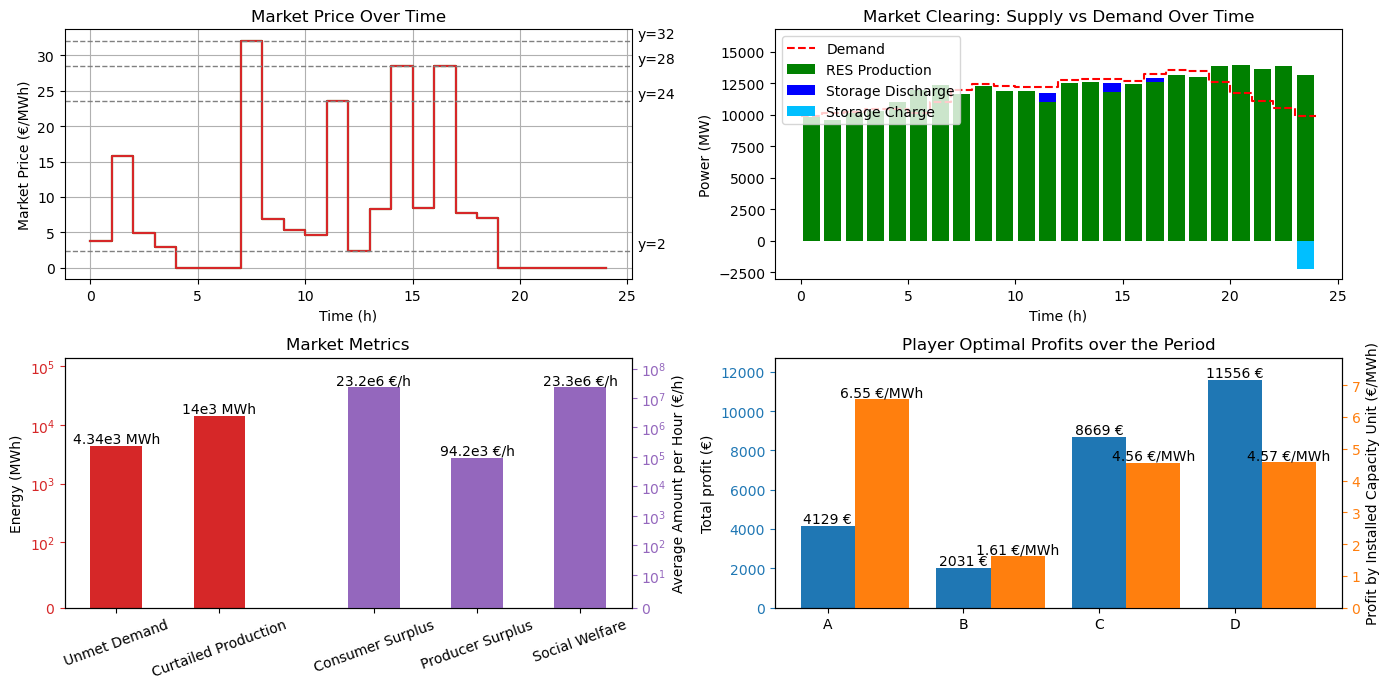

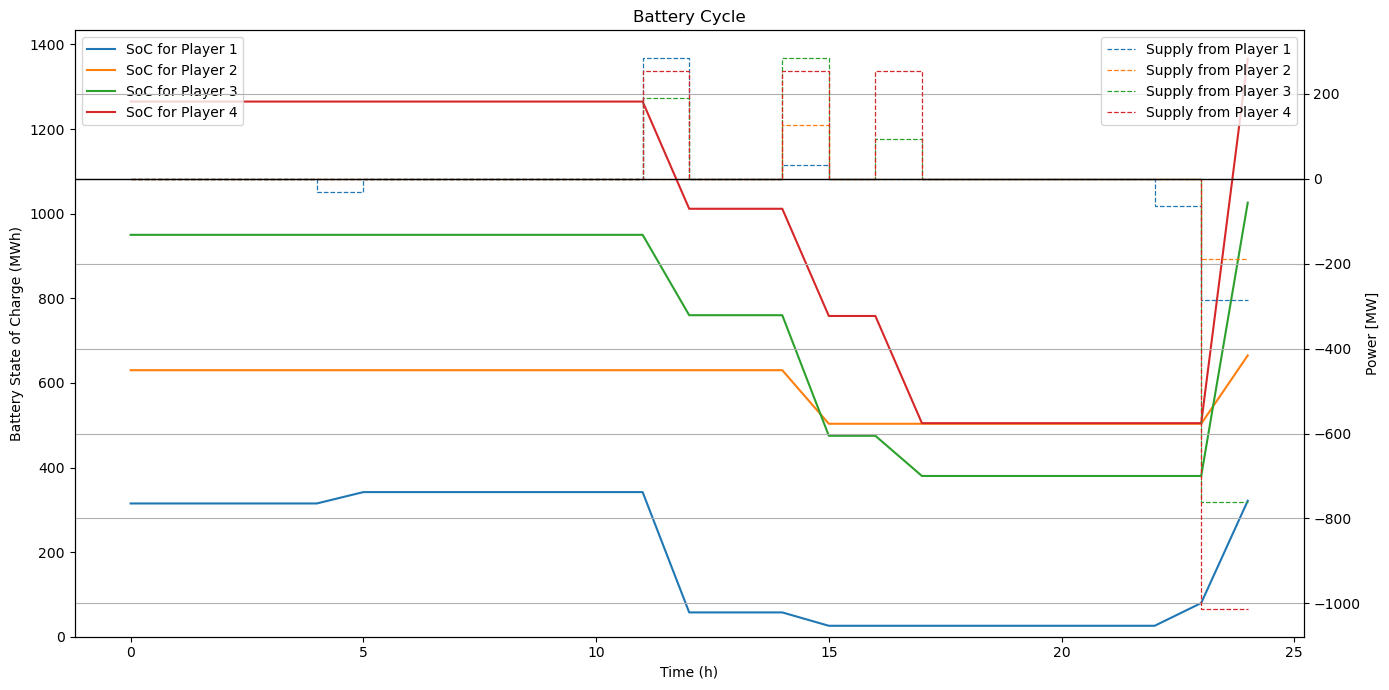

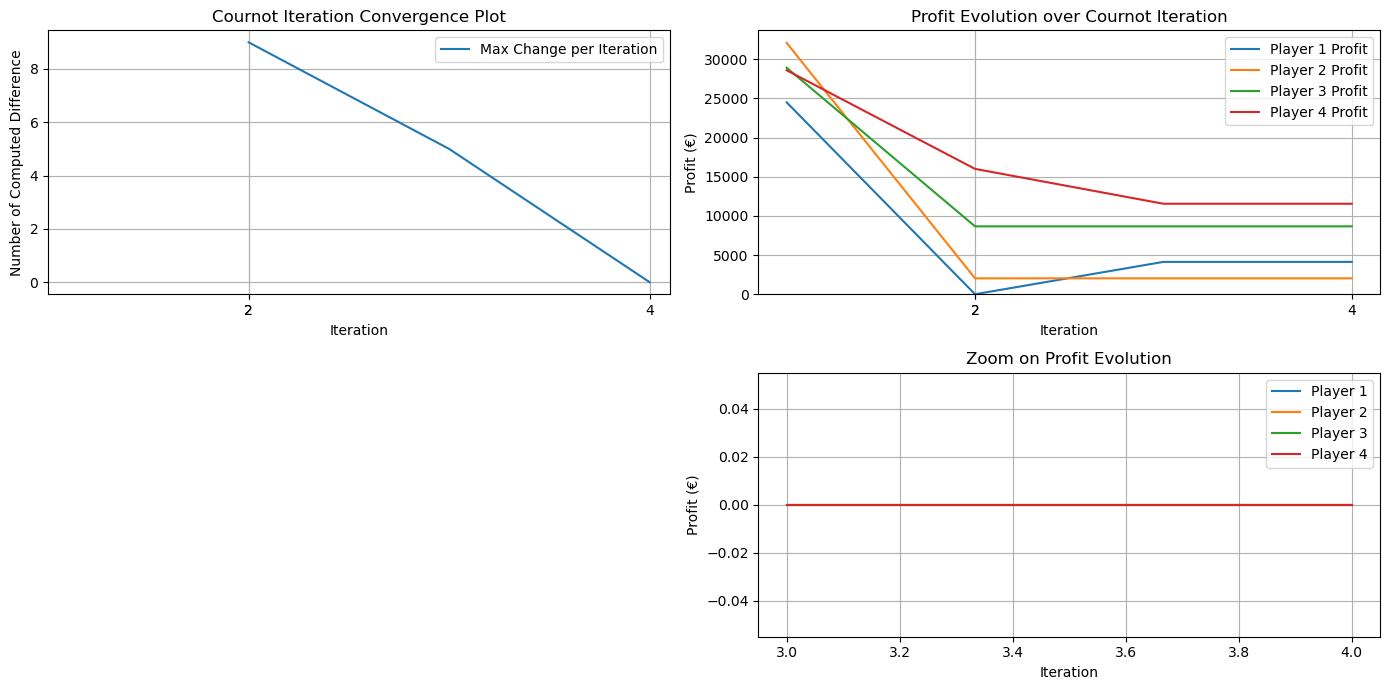


Optimization with modelling policy: dynamic_tariff
  Player   OC   Eta   E_max   Q_max  \
0      A  5.0  0.85   630.0   316.0   
1      B  5.0  0.85  1260.0   633.0   
2      C  5.0  0.85  1900.0   950.0   
3      D  5.0  0.85  2530.0  1267.0   

                                             Q_steps  
0  [0.0, 31.6, 63.2, 94.8, 126.4, 158.0, 189.6, 2...  
1  [0.0, 63.3, 126.6, 189.9, 253.2, 316.5, 379.8,...  
2  [0.0, 95.0, 190.0, 285.0, 380.0, 475.0, 570.0,...  
3  [0.0, 126.7, 253.4, 380.1, 506.8, 633.5, 760.2...  
Optimization was successful. It converged in 4 iterations.


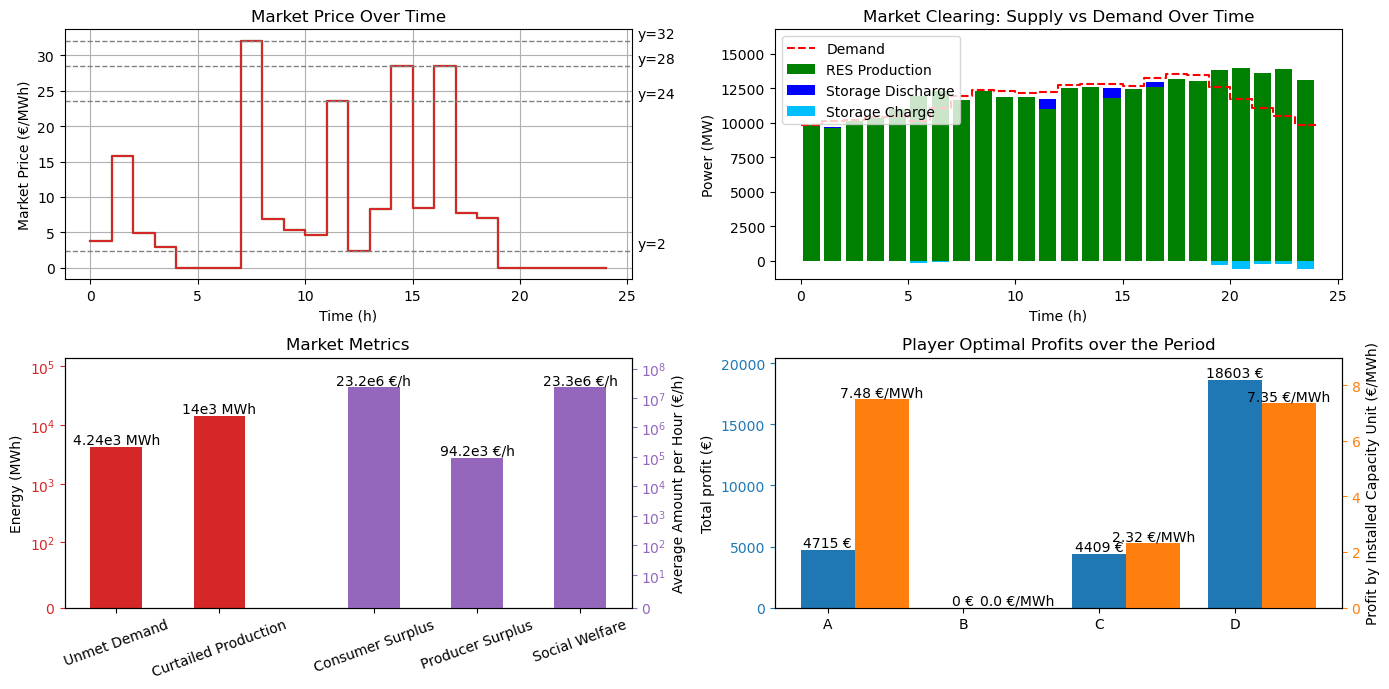

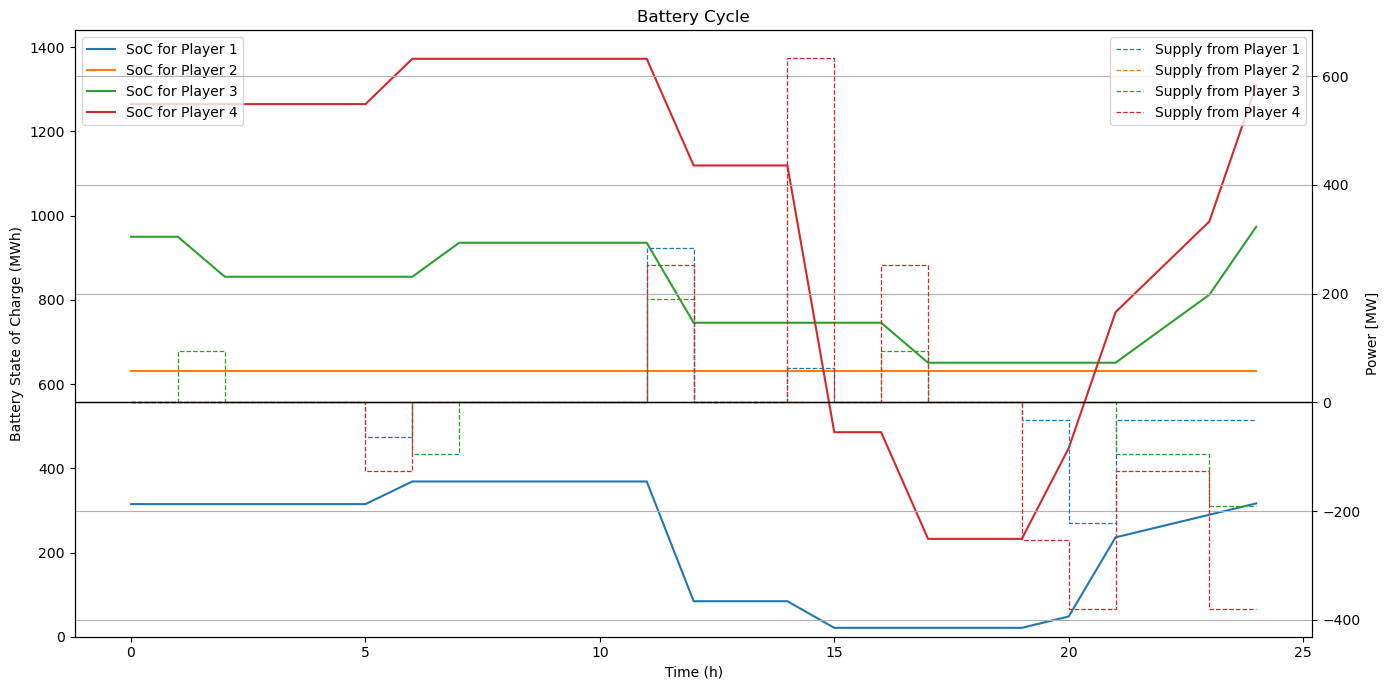

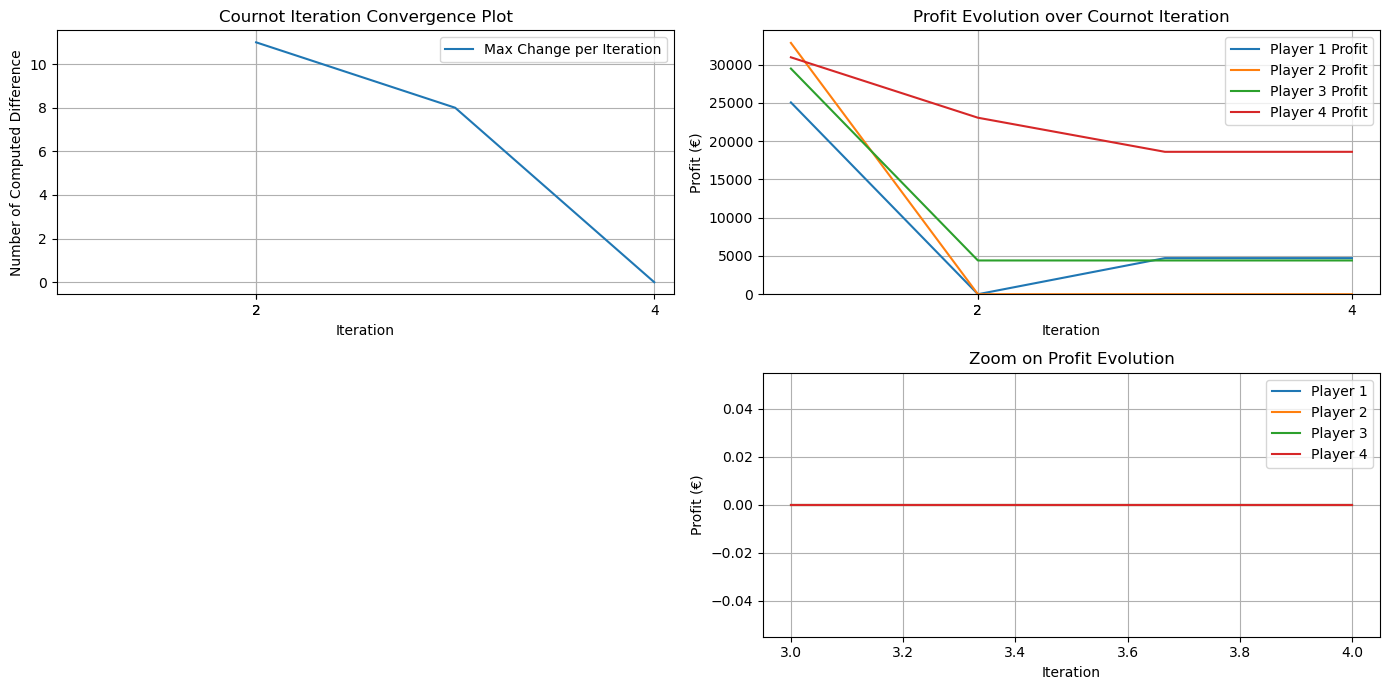

In [ ]:
season = "Winter"
scenarios[2]["season"] = season

outputs = {}

for i, scen in enumerate(scenarios):
    print("\nOptimization with modelling policy:", scen["name"])
    outputs[scen["name"]] = main(season=season, plots=True, policy_type=scen["policy_type"], policy_parameters={k: v for k, v in scen.items() if k != "name" and k != "policy_type"})

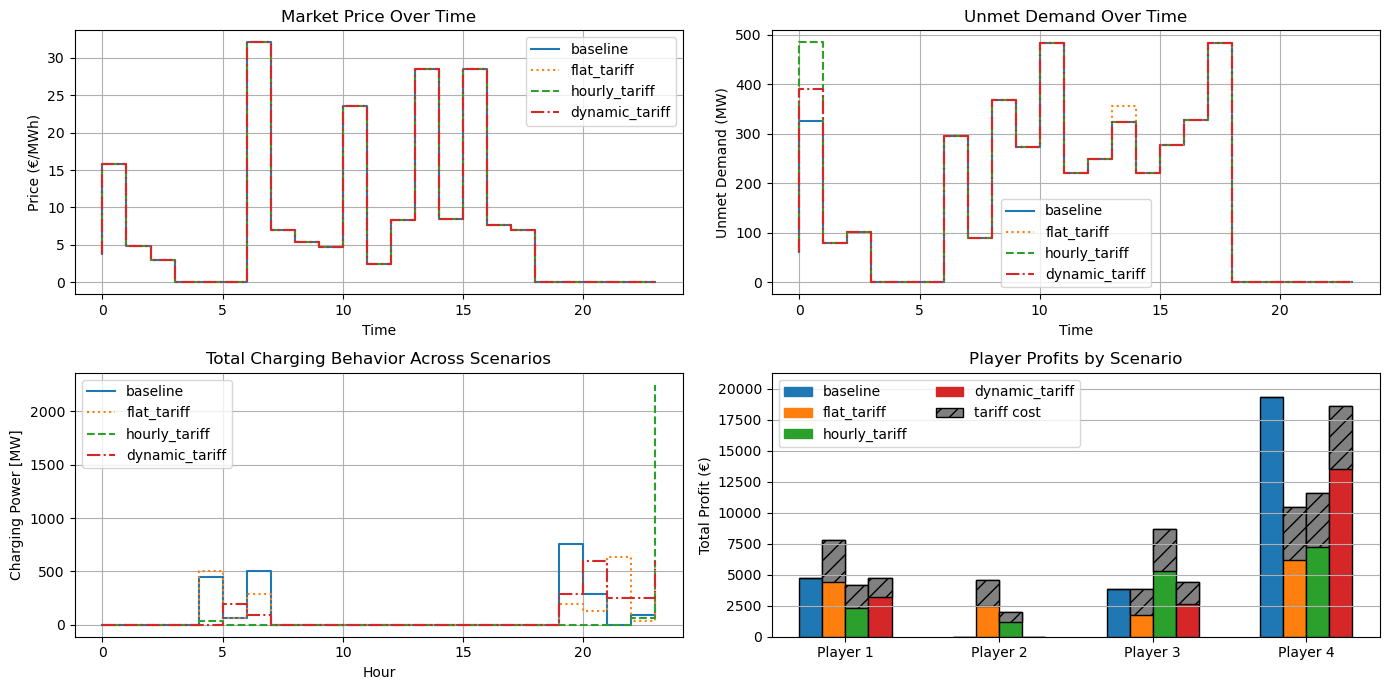

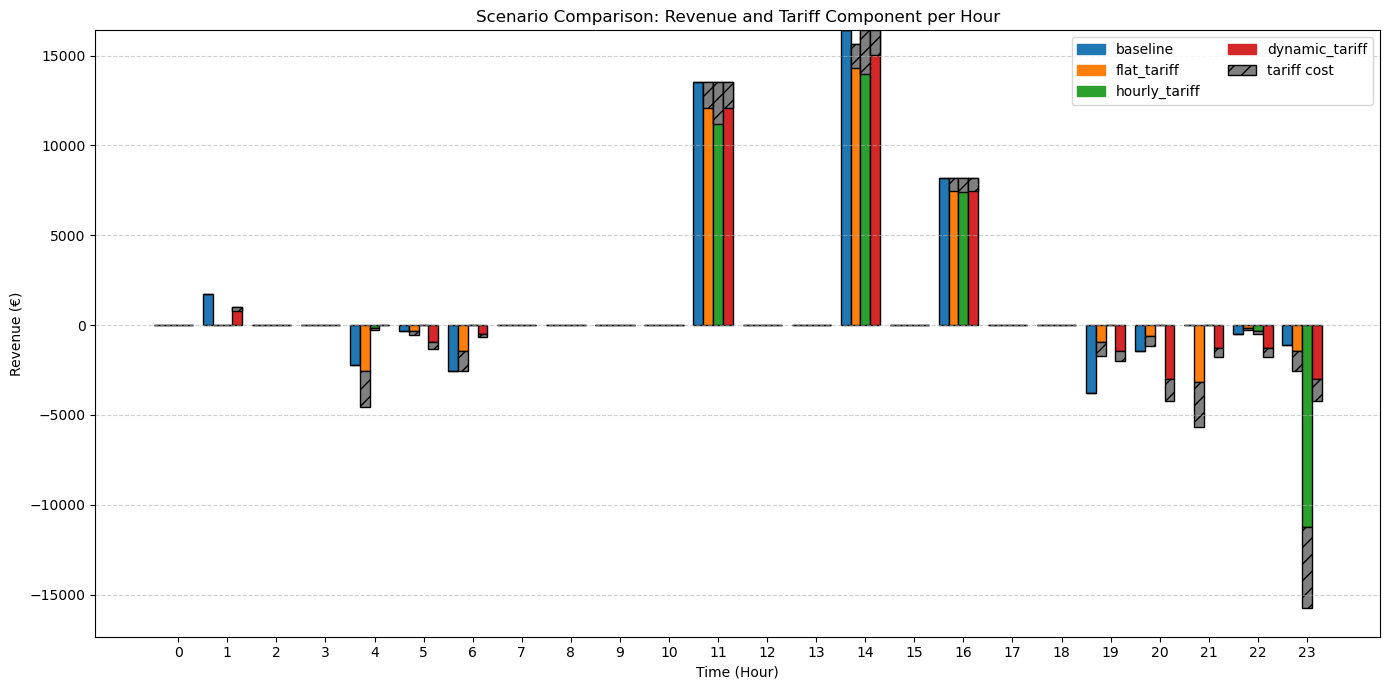

In [ ]:
# Compararison of tariffs policies - 4 players - Winter
plot_scenarios_analysis(outputs)

## Summer Scenario

In [ ]:
season = "Summer"
scenarios[2]["season"] = season

outputs = {}

for i, scen in enumerate(scenarios):
    print("\nOptimization with modelling policy:", scen["name"])
    outputs[scen["name"]] = main(season=season, plots=False, policy_type=scen["policy_type"], policy_parameters={k: v for k, v in scen.items() if k != "name" and k != "policy_type"})


Optimization with modelling policy: baseline
  Player   OC   Eta   E_max   Q_max  \
0      A  5.0  0.85  1150.0   576.0   
1      B  5.0  0.85  2300.0  1152.0   
2      C  5.0  0.85  3450.0  1728.0   
3      D  5.0  0.85  4600.0  2304.0   

                                             Q_steps  
0  [0.0, 57.6, 115.2, 172.8, 230.4, 288.0, 345.6,...  
1  [0.0, 115.2, 230.4, 345.6, 460.8, 576.0, 691.2...  
2  [0.0, 172.8, 345.6, 518.4, 691.2, 864.0, 1036....  
3  [0.0, 230.4, 460.8, 691.2, 921.6, 1152.0, 1382...  
Optimization was successful. It converged in 8 iterations.

Optimization with modelling policy: flat_tariff
  Player   OC   Eta   E_max   Q_max  \
0      A  5.0  0.85  1150.0   576.0   
1      B  5.0  0.85  2300.0  1152.0   
2      C  5.0  0.85  3450.0  1728.0   
3      D  5.0  0.85  4600.0  2304.0   

                                             Q_steps  
0  [0.0, 57.6, 115.2, 172.8, 230.4, 288.0, 345.6,...  
1  [0.0, 115.2, 230.4, 345.6, 460.8, 576.0, 691.2...  
2  [0.0, 172.8

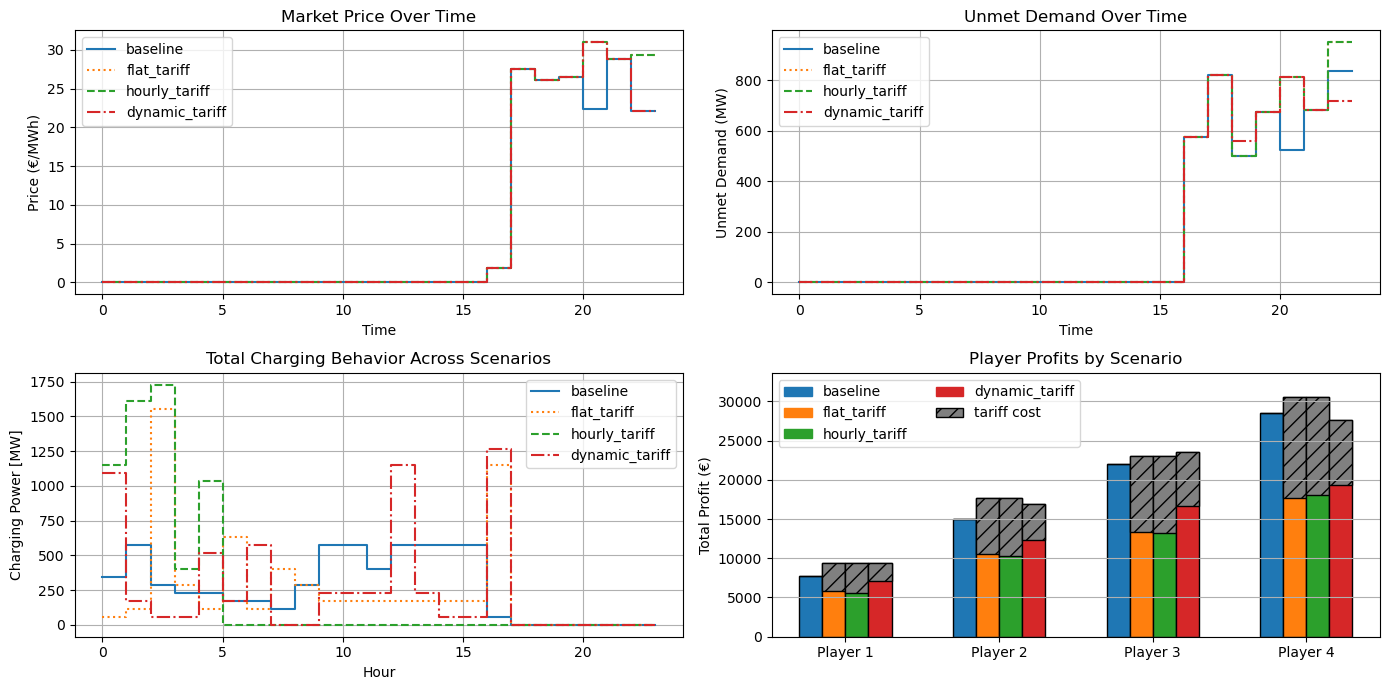

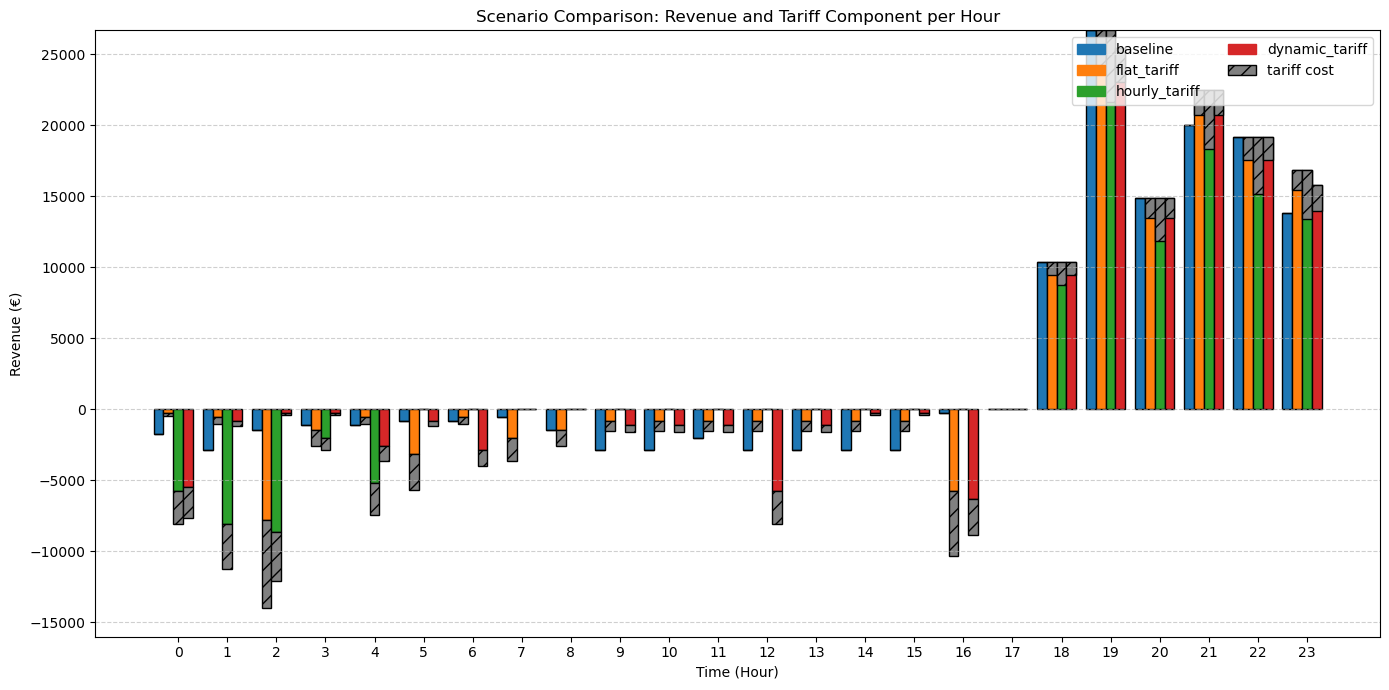

In [ ]:
plot_scenarios_analysis(outputs)